# Multi-label text classification

**Author:** [Farrokh Karimi](https://farrokhkarimi.github.io/)  
**Description:** In this notebook, we want to classify the Ronash dataset into 20 category.

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import tensorflow as tf
import warnings
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

In [2]:
# downloading Data from the Google Drive link
!gdown 1Yq3XTnACkvaIiNlhX09Zth55nOau7jQy

Downloading...
From: https://drive.google.com/uc?id=1Yq3XTnACkvaIiNlhX09Zth55nOau7jQy
To: /content/Ronash_DS_Assignment.csv
100% 1.05M/1.05M [00:00<00:00, 42.8MB/s]


In [5]:
# reading the csv file as a dataframe
df = pd.read_csv('Ronash_DS_Assignment.csv')
df.head(5)

,product_id,title,vendor,tags,category
0,3937721221199,Fidele Super Premium Adult Large Breed Dog Food,Fidele,"['Adult', 'Bangalore', 'Chennai', 'Chicken', '...",Animals & Pet Supplies
1,7353058033889,Foldable Pet Toys Linen Storage,Cap Point,[],Animals & Pet Supplies
2,6594773549129,Bok Dok Diaper,Pets Home,"['Brand_Pet Arabia', 'Category_Pets Home', 'Ca...",Animals & Pet Supplies
3,4802008318014,Tastybone Toy Chicken,TastyBone,[],Animals & Pet Supplies
4,1779705151539,Leather Leash Tab - Short Dog Leash,Mighty Paw,"['Leash', 'Leash Tab', 'Training']",Animals & Pet Supplies


In [7]:
# counting the number of each label
df['category'].value_counts()

Apparel & Accessories        1000
Animals & Pet Supplies        500
Food, Beverages & Tobacco     400
Sporting Goods                400
Luggage & Bags                400
Home & Garden                 400
Health & Beauty               400
Media                         300
Toys & Games                  300
Furniture                     200
Baby & Toddler                200
Arts & Entertainment          200
Electronics                   100
Business & Industrial         100
Office Supplies               100
Vehicles & Parts              100
Hardware                       50
Cameras & Optics               50
Software                       50
Religious & Ceremonial         20
Name: category, dtype: int64

In [8]:
# counting how many indices are duplicated in each column
print(f"There are {sum(df['title'].duplicated())} duplicate title.")
print(f"There are {sum(df['vendor'].duplicated())} duplicate vondor.")
print(f"There are {sum(df['tags'].duplicated())} duplicate tags.")

There are 0 duplicate title.
There are 1256 duplicate vondor.
There are 716 duplicate tags.


In [9]:
# counting the number of Nan samples
df.isnull().values.sum()
df = df.dropna()

There are just 3 Nan samples in the dataset so we can ignore them.

In [10]:
# the function for extracting and standardizing the sentences
def text_extraction(dfi):
  # in this function, we concatenate text feature parts of the data as a sentence
  sentence = ' '.join([dfi['title'], str(dfi['vendor']), dfi['tags']])
  # Remove punctuations
  sentence = re.sub('[^a-zA-Z0-9$.]', ' ', sentence)
  # Single character removal
  sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
  # Removing multiple spaces
  sentence = re.sub(r'\s+', ' ', sentence)
  # Changint to lowercase
  sentence = sentence.lower()
  return sentence

# printing 10 sample sentences
for i in range(5):
  print(text_extraction(df.iloc[i]))

fidele super premium adult large breed dog food fidele adult bangalore chennai chicken doberman dog dry foods fidele german shepherd golden retriever great dane highpriority imported labrador less than 1000 less than 2000 less than 500 mastiff orange pet nutrition 
foldable pet toys linen storage cap point 
bok dok diaper pets home brand pet arabia category pets home category small pets supplies type pet home type pet supplies 
tastybone toy chicken tastybone 
leather leash tab short dog leash mighty paw leash leash tab training 


In [101]:
warnings.filterwarnings("ignore", category=FutureWarning)
# creating the dataset
dataset = pd.DataFrame(columns=['text', 'label'])
for i in range(len(df)):
  dataset = dataset.append({'text':text_extraction(df.iloc[i]), 'label':df.iloc[i]['category']}, ignore_index = True)

# creating integer labels for multiclass training
dataset['label_int'] = pd.Categorical(dataset['label']).codes



In [12]:
# printing each integer label and its corresponding name label
labels_names = list(Counter(dataset['label']).keys())

for i, label in enumerate(labels_names):
  print("Label", i, "corresponds to", label)

Label 0 corresponds to Animals & Pet Supplies
Label 1 corresponds to Apparel & Accessories
Label 2 corresponds to Arts & Entertainment
Label 3 corresponds to Baby & Toddler
Label 4 corresponds to Business & Industrial
Label 5 corresponds to Cameras & Optics
Label 6 corresponds to Electronics
Label 7 corresponds to Food, Beverages & Tobacco
Label 8 corresponds to Furniture
Label 9 corresponds to Hardware
Label 10 corresponds to Health & Beauty
Label 11 corresponds to Home & Garden
Label 12 corresponds to Luggage & Bags
Label 13 corresponds to Media
Label 14 corresponds to Office Supplies
Label 15 corresponds to Religious & Ceremonial
Label 16 corresponds to Software
Label 17 corresponds to Sporting Goods
Label 18 corresponds to Toys & Games
Label 19 corresponds to Vehicles & Parts


In [13]:
dataset = dataset.drop(['label'], axis=1)
dataset

,text,label_int
0,fidele super premium adult large breed dog foo...,0
1,foldable pet toys linen storage cap point,0
2,bok dok diaper pets home brand pet arabia cate...,0
3,tastybone toy chicken tastybone,0
4,leather leash tab short dog leash mighty paw l...,0
...,...,...
5262,candylab moo milk van candylab 3 years candyla...,19
5263,truck modern era vehicles red white scale ho w...,19
5264,car sticker flags decal american flag sticker ...,19
5265,lazer helmets bayamo pit bull full face open b...,19


In [14]:
# splitting dataset to train, validation, and test dataframes
train_df, test_df= train_test_split(dataset, test_size=0.2, random_state=42)
val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print(f"Number of samples in training set: {len(train_df)}")
print(f"Number of samples in validation set: {len(val_df)}")
print(f"Number of samples in test set: {len(test_df)}")

# extracting texts and labels from dataframes
train_texts = train_df['text']
train_labels = train_df['label_int']
val_texts = val_df['text']
val_labels = val_df['label_int']
test_texts = test_df['text']
test_labels = test_df['label_int']

Number of samples in training set: 4213
Number of samples in validation set: 527
Number of samples in test set: 527


In [15]:
# creating data generators with batch size 32
batch_size = 32
raw_train_batch = tf.data.Dataset.from_tensor_slices((train_texts, train_labels)).batch(batch_size)
raw_val_batch = tf.data.Dataset.from_tensor_slices((val_texts, val_labels)).batch(batch_size)
raw_test_batch = tf.data.Dataset.from_tensor_slices((test_texts, test_labels)).batch(batch_size)

# printing texts and labels of a batch of raw train
for text, label in raw_train_batch.take(1):
  print('Texts: {}'.format(text))
  print('labels: {}'.format(label))

Texts: [b'seachem multitest ammonia seachem '
 b'smart electric cat teasing toy pet clever cat toys cats rr track catproducts rr track cattoys '
 b'ocean hunter wood sculpture novica united inc assembly required 492 assembly requiredstr no assembly required class home accessories classid 581 color 5829 colorstr brown department decor departmentid 542 margin 60 material style 33 stylestr modern subclass home accessories subclassid 793 '
 b'impala rollerskates leopard impala cheetah impala leopard red roller skate rollerskate skate skates vegan '
 b'diy personalised dreamcatcher activity kit sea animal doxbox store '
 b'treasure by estetica remy human hair wig closeout estetica liquid show percent off show percent off '
 b'etching cl grenadine drapery upholstery fabric by kaufmann kaufmann hidden pk ikat khaki multi color print red shop fabric throw pillows trim wallpaper ikat shop fabric throw pillows trim wallpaper kaufmann shop fabric throw pillows trim wallpaper prints '
 b'bleed pro

In [16]:
# counting how many words are there in the whole texts of the dataset
num_of_words = 0
for i in dataset['text']: num_of_words += len(i.split())

print(num_of_words)

112524


There are about 112000 words in the texts.



In [17]:
# counting max sequence length and how many non-repetitive words are there in the whole texts of the dataset
l = []
max_seq_lenght = 0
for i in dataset['text']:
  lenght = len(i.split())
  if lenght > max_seq_lenght: max_seq_lenght = lenght
  for j in i.split():
    if j not in l: l.append(j)

print(max_seq_lenght)
print(len(l))

309
18927


Maximum sequence length is 309 and There are about 19000 non-repetitive words in the whole dataset texts. So we set max word features to 10000 and sequence length to 350.

In [45]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# setting the text vectorization layer with 10000 words and 350 sequence length
max_features = 18500
sequence_length = 320

vectorize_layer = layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

# fitting the state of the preprocessing layer to the train set. This will cause the model to build an index of strings to integers.
vectorize_layer.adapt(train_texts)

# defining the vectorize text function
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

# retrieving a sample from a batch of texts and labels from the train set
text_batch, label_batch = next(iter(raw_train_batch))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", first_label)
print("Vectorized text", vectorize_text(first_review, first_label))

Review tf.Tensor(b'seachem multitest ammonia seachem ', shape=(), dtype=string)
Label tf.Tensor(0, shape=(), dtype=int8)
Vectorized text (<tf.Tensor: shape=(1, 320), dtype=int64, numpy=
array([[ 2075,  6580, 15510,  2075,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     

In [46]:
# getting corresponding word of each integer
print("1401 ---> ",vectorize_layer.get_vocabulary()[1401])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[313])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1401 --->  moderate
 313 --->  soft
Vocabulary size: 16371


In [47]:
# creating train, val, and test vectorized dataset and prefetching them

train_ds = raw_train_batch.map(vectorize_text)
val_ds = raw_val_batch.map(vectorize_text)
test_ds = raw_test_batch.map(vectorize_text)
print(type(train_ds))
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

<class 'tensorflow.python.data.ops.map_op._MapDataset'>


In [65]:
# model configuration
embedding_dim = 32
num_of_labels = 20

model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.3),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(num_of_labels)])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 32)          592032    
                                                                 
 dropout_18 (Dropout)        (None, None, 32)          0         
                                                                 
 global_average_pooling1d_9   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 20)                660       
                                                                 
Total params: 592,692
Trainable params: 592,692
Non-trainable params: 0
________________________________________________

In [ ]:
tf.keras.utils.plot_model(model, rankdir="TD", show_shapes=True)

In [66]:
# model compilation
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [67]:
# training the model
epochs = 200

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=5,
                                            verbose=1)

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs,
                    callbacks=[callback])

Epoch 1/200
132/132 [==============================] - 2s 9ms/step - loss: 2.8802 - accuracy: 0.1816 - val_loss: 2.7445 - val_accuracy: 0.1879
Epoch 2/200
132/132 [==============================] - 1s 8ms/step - loss: 2.7092 - accuracy: 0.1878 - val_loss: 2.6629 - val_accuracy: 0.1879
Epoch 3/200
132/132 [==============================] - 1s 8ms/step - loss: 2.6823 - accuracy: 0.1878 - val_loss: 2.6499 - val_accuracy: 0.1879
Epoch 4/200
132/132 [==============================] - 1s 8ms/step - loss: 2.6736 - accuracy: 0.1878 - val_loss: 2.6431 - val_accuracy: 0.1879
Epoch 5/200
132/132 [==============================] - 2s 12ms/step - loss: 2.6650 - accuracy: 0.1878 - val_loss: 2.6369 - val_accuracy: 0.1879
Epoch 6/200
132/132 [==============================] - 1s 8ms/step - loss: 2.6572 - accuracy: 0.1878 - val_loss: 2.6313 - val_accuracy: 0.1879
Epoch 7/200
132/132 [==============================] - 1s 9ms/step - loss: 2.6526 - accuracy: 0.1880 - val_loss: 2.6250 - val_accuracy: 0.187

In [68]:
# printing loss and accuracy of the model on the test set
loss, accuracy = model.evaluate(test_ds)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

17/17 [==============================] - 0s 2ms/step - loss: 0.7559 - accuracy: 0.8349
Loss:  0.7558644413948059
Accuracy:  0.8349146246910095


In [69]:
# extracting the history of training and its keys
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [70]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

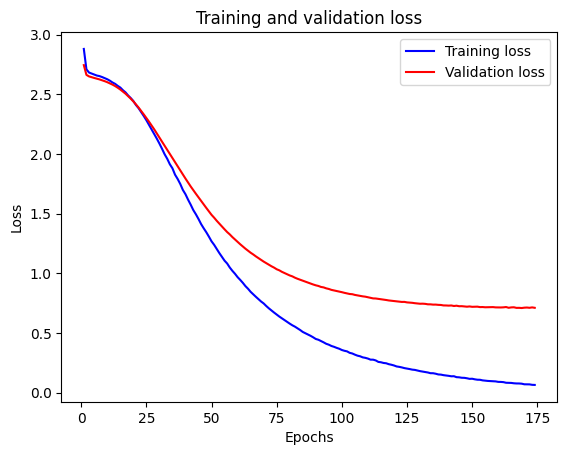

In [71]:
# ploting of loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

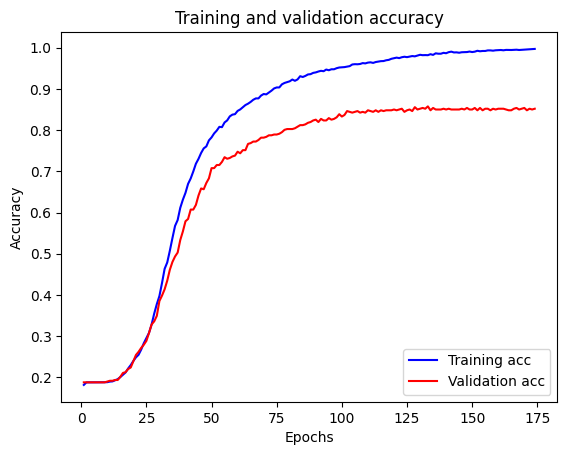

In [72]:
# plotting of accuracy
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [73]:
# creating the probability model for testing
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

# predicting test samples
predictions = probability_model.predict(raw_test_batch.map(vectorize_text))

17/17 [==============================] - 0s 1ms/step


In [74]:
# showing the first test sample result label
np.argmax(predictions[0])

17

In [87]:
# showing the true label of the first test sample
x = test_df.iloc[0]
ser = pd.Series(x, copy=False)
print(ser.iloc[0])
print('label: {}'.format(labels_names[ser.iloc[1]]))

fluke tone on tone premium hooded sweat shirt erazor bits 4xl 5xl apparel fishing green hooded sweat shirt large lifestyle humor medium rr track mil small large xx large xxx large 
label: Sporting Goods


**Author:** https://farrokhkarimi.github.io/